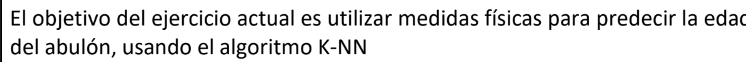

In [2]:
import pandas as pd
url = (
"https://archive.ics.uci.edu/ml/machine-learning-databases"
"/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)
abalone.columns = [
"Sex",
"Length",
"Diameter",
"Height",
"Whole weight",
"Shucked weight",
"Viscera weight",
"Shell weight",
"Rings",
]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


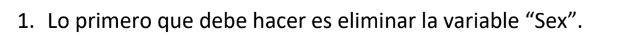

In [4]:
# Eliminar columna Sex del dataset
abalone = abalone.drop('Sex', axis=1)
abalone.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


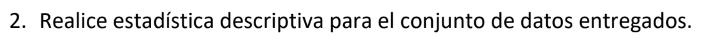

In [5]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


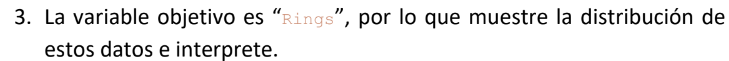

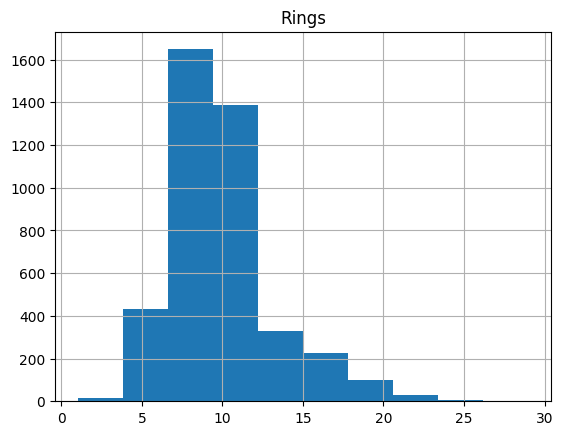

In [6]:
# Crear un histograma de la variable Rings
import matplotlib.pyplot as plt
abalone.hist(column='Rings')
plt.show()

In [7]:
# Test de hipotesis para verificar normalidad en los resiudales del modelo
from scipy.stats import shapiro

# Shapiro-Wilk Test
_, p = shapiro(abalone['Rings'])

print(f'Shapiro-Wilk Test: {p:.5f}')

if p > 0.05:
    print('Se rechaza H0, por lo que se puede asumir que la variable Rings distribuye de forma normal.')

else:
    print('No se rechaza H0, por lo que la variable Rings no distribuye de forma normal.')

Shapiro-Wilk Test: 0.00000
No se rechaza H0, por lo que la variable Rings no distribuye de forma normal.


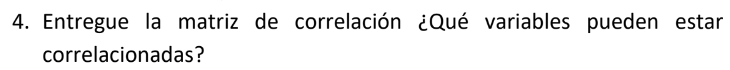

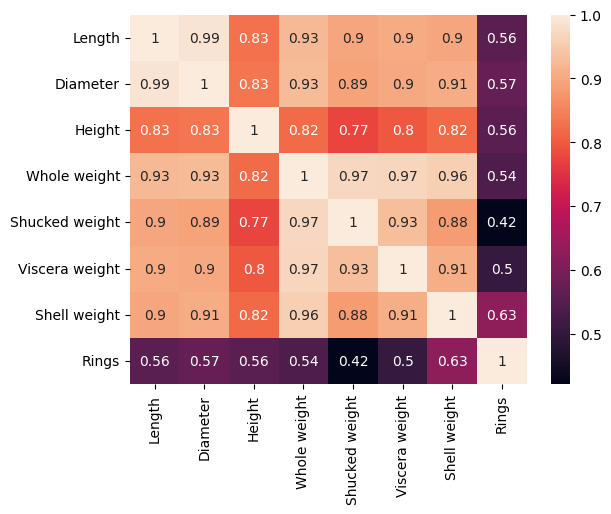

In [8]:
# Generar matriz de correlacion
import seaborn as sns
corr = abalone.corr()
sns.heatmap(corr, annot=True)
plt.show()

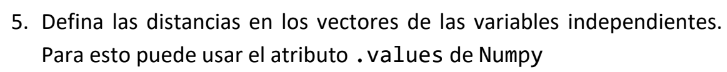

In [9]:
import numpy as np

In [10]:
abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
# Crear ciclo for para calcular distancia euclidiana entre pares de variables independientes
distancias = []
for i in range(0, len(abalone.columns)):
    for j in range(i+1, len(abalone.columns)):
        distancia = np.sqrt(np.sum((abalone.iloc[:,i] - abalone.iloc[:,j])**2))
        distancias.append(distancia)

distancias = np.array(distancias)
distancias

array([  7.70985571,  25.50030637,  31.58006159,  13.38903126,
        22.44289692,  18.8538706 , 641.49179022,  17.89852648,
        37.53752083,   9.61149484,  15.01140707,  11.70309902,
       648.79959387,  53.43615723,  18.83742904,   5.82752411,
         9.46988948, 665.93679167,  35.34049553,  48.73720366,
        44.65494198, 619.31579469,  14.14332658,  10.93536372,
       651.1497953 ,   5.4397482 , 662.79825718, 658.58644594])

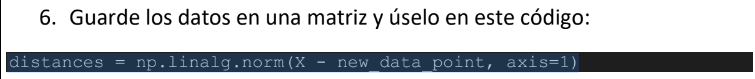

In [12]:
X = abalone.drop('Rings', axis=1).values
new_data = np.array([5, 0.35, 0.25, 0.09, 0.1, 0.15, 0.05])
distances = np.linalg.norm(X-new_data, axis=1) # calcular la norma de las distancias
distances.shape

idx = np.argsort(distances) # ordenar las distancias de menor a mayor

In [13]:
k = 3
print(idx[:k]) # mostrar los indices de los k vecinos mas cercanos
print(distances[idx[:k]]) # mostrar las distancias de los k vecinos mas cercanos
print(abalone.iloc[idx[:k]]) # mostrar las etiquetas de los k vecinos mas cercanos

[4046 3270 1412]
[4.44910241 4.45508886 4.45725226]
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
4046   0.600     0.460   0.155        0.6655          0.2850          0.1490   
3270   0.625     0.475   0.130        0.8595          0.3195          0.1775   
1412   0.670     0.505   0.175        1.0145          0.4375          0.2710   

      Shell weight  Rings  
4046        0.2690     11  
3270        0.2400     13  
1412        0.3745     10  


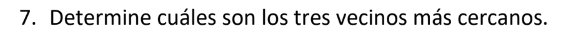

In [14]:
# agregar la distancia al dataframe
abalone['distance'] = distances

# mostrar los indices y distancias de los 3 vecinos mas cercanos
k = 3
nearest = np.argsort(distances)[:k]
nearest

# mostrar los 3 vecinos mas cercanos
abalone.iloc[nearest]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,distance
4046,0.600,0.460,0.155,0.6655,0.2850,0.1490,0.2690,11,4.449102
3270,0.625,0.475,0.130,0.8595,0.3195,0.1775,0.2400,13,4.455089
1412,0.670,0.505,0.175,1.0145,0.4375,0.2710,0.3745,10,4.457252


In [15]:
print(f"Los indices de los {k} vecinos mas cercanos son: {nearest} \nque corresponden respectivamente a las distancias: {distances[nearest]}")

Los indices de los 3 vecinos mas cercanos son: [4046 3270 1412] 
que corresponden respectivamente a las distancias: [4.44910241 4.45508886 4.45725226]
